<a href="https://colab.research.google.com/github/ZahraDehghani99/Digital-Image-Processing/blob/main/examples/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2  
from google.colab.patches import cv2_imshow # for image display
from skimage import io

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Y = np.arange(12).reshape(3,4)
print(Y)
print(Y.shape)
print(Y.shape[0])
print(Y.shape[::-1])
print(Y.shape[::])


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(3, 4)
3
(4, 3)
(3, 4)


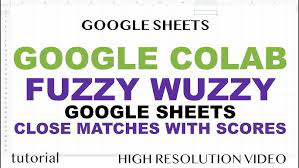

img gray shape : (168, 299)


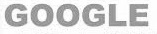

template shape : (34, 157)


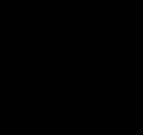

loc 0 => [42 42 42 43 43 43 44 44]
loc 1 => [ 8  9 10  8  9 10  9 10]
pt 0 => 8
pt 1 => 42
pt 0 => 9
pt 1 => 42
pt 0 => 10
pt 1 => 42
pt 0 => 8
pt 1 => 43
pt 0 => 9
pt 1 => 43
pt 0 => 10
pt 1 => 43
pt 0 => 9
pt 1 => 44
pt 0 => 10
pt 1 => 44


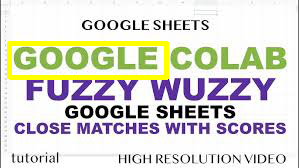

In [10]:
# Read and display the image

# Read the main image
img_rgb = io.imread('/content/drive/MyDrive/DIP/examples/images.png') 
cv2_imshow(img_rgb) 
# Convert it to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
print(f'img gray shape : {img_gray.shape}')

# Read the template
template = cv2.imread('/content/drive/MyDrive/DIP/examples/template.png', 0)
 #  In the case of color images, the decoded images will have the channels stored in **B G R** order.
 #  When using IMREAD_GRAYSCALE, the codec's internal grayscale conversion will be used

cv2_imshow(template) 
print(f'template shape : {template.shape}')

# Store width and height of template in w and h
w, h = template.shape[::-1]

# Perform match operations.
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
cv2_imshow(res)
# Specify a threshold
threshold = 0.8
 
# Store the coordinates of matched area in a numpy array
loc = np.where( res >= threshold)
print(f'loc 0 => {loc[0]}')
print(f'loc 1 => {loc[1]}')
# Draw a rectangle around the matched region.

#zip() returns an iterable, an object that can be used to loop over. 
#It creates tuples of the input arguments and using for pt in it returns these one by one. 
#In this case the input is an array of x-values and an array of y-values, so it will return an (x,y) tuple.
#The tuple is stored in pt.

#In Python, the * (asterisk) character is not only used for multiplication, but also for unpacking
for pt in zip(*loc[::-1]):    #zip(loc[1],loc[0]) does the same as zip(*loc[:: -1])
    print(f'pt 0 => {pt[0]}')
    print(f'pt 1 => {pt[1]}')
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
 
# Show the final image with the matched area.
cv2_imshow(img_rgb)
#image_2 = cv2.cvtColor(image_2, cv.COLOR_BGR2RGB)
#cv2_imshow(image_2)  

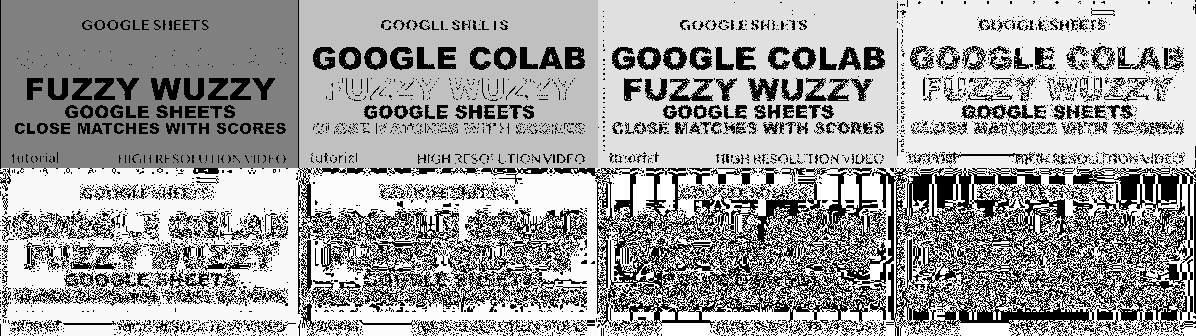

eight_bit_img : 
[[  0 128 128 ... 128 128   0]
 [  0 128 128 ... 128 128   0]
 [  0 128 128 ... 128 128   0]
 ...
 [  0 128 128 ... 128 128   0]
 [  0 128 128 ... 128 128   0]
 [  0 128 128 ... 128 128   0]]
three_bit_img : 
[[0 4 4 ... 4 4 4]
 [4 0 0 ... 4 4 4]
 [0 4 4 ... 4 4 0]
 ...
 [0 4 4 ... 4 4 4]
 [0 4 4 ... 4 4 4]
 [0 4 4 ... 4 4 4]]


In [17]:
import numpy as np
import cv2
# Read the image in greyscale
img = cv2.imread('/content/drive/MyDrive/DIP/examples/images.png', 0)

#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits

# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])

#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img*255,seven_bit_img*255,six_bit_img*255,five_bit_img*255])
finalv =cv2.hconcat([four_bit_img*255,three_bit_img*255,two_bit_img*255,one_bit_img*255])

# Vertically concatenate
final = cv2.vconcat([finalr,finalv])

# Display the images
cv2_imshow(final)
print(f'eight_bit_img : \n{eight_bit_img}')
print(f'three_bit_img : \n{three_bit_img}')